In [1]:
%matplotlib inline
# import warnings
# warnings.filterwarnings("ignore")
from pyVPRM.lib.fancy_plot import *
from rioxarray import merge
import numpy as np
import os
import glob
import xarray as xr
import shutil
import cartopy.crs as ccrs
import geopandas as gpd
from shapely import geometry
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from IPython.display import display
from pyVPRM.lib.functions import parse_wrf_grid_file


KeyboardInterrupt



In [ ]:
# define the bins and normalize
cmap = plt.cm.inferno_r
cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = '#c4c4c4'
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 1, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Merge Splits

In [ ]:
base_in =  'path_to_the_folder_with_the_files'
for fbase in np.unique([i.split('_part')[0] for i in glob.glob(os.path.join(base_in, 'VPRM_input*part_*'))]):
    print(fbase)   
   if os.path.exists(fbase+'.nc'):
       continue
    # if os.path.exists(fbase+'.nc'):
    #    os.remove(fbase+'.nc')
    lon_stripes = []
    cols = np.max([int(i.split('_part_')[1].split('_')[0]) for i in glob.glob(os.path.join(base_in, 'VPRM_input*part_*'))])
    for i in np.arange(1,cols+1):
        files = np.array(glob.glob(fbase+'*{}.nc'.format(i)))
        print(len(files))
        inds = np.argsort([int(i.split('_')[-2]) for i in files])
        files = files[inds]
        try: 
            lon_stripes.append(xr.concat([xr.open_dataset(i).drop_dims(['x_b', 'y_b']) for i in files],
                                   dim ='west_east', compat='no_conflicts'))
        except:
            lon_stripes.append(xr.concat([xr.open_dataset(i) for i in files],
                                   dim ='west_east', compat='no_conflicts'))
        if not os.path.exists(os.path.join(base_in,'splits')):
            os.makedirs(os.path.join(base_in, 'splits'))
        for file in files:
            shutil.move(file, os.path.join(base_in, 'splits', os.path.basename(file)))
        #print(lon_stripes)
    full = xr.concat(lon_stripes,dim ='south_north')
    print(fbase+'.nc')

    full.to_netcdf(fbase+'.nc')

In [4]:
base_path =  'path_to_the_folder_with_the_files'
t_file_fra = 'VPRM_input_VEG_FRA_2022.nc'
t_file_evi = 'VPRM_input_EVI_2022.nc'

in_base_evi = xr.open_dataset(os.path.join(base_path, t_file_evi))
in_base_veg_frac = xr.open_dataset(os.path.join(base_path, t_file_fra))



9
8
7
6
4
3
2
1


/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute 

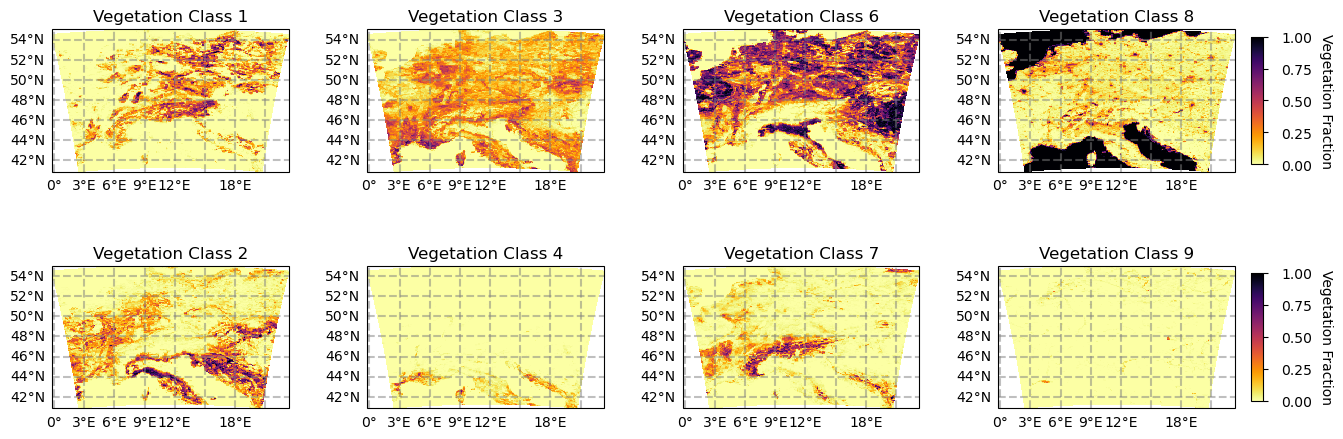

In [6]:
# define the bins and normalize
cmap = plt.cm.inferno_r
cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = '#c4c4c4'
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 1, 11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(111, figsize = figsize(2.5, ratio=0.3))
for c,i in enumerate(np.array([1,2,3,4,6,7,8,9])[::-1]):
    print(i)
    ax = fig.add_axes((1-(int(c/2))*0.2+0.04, c%2 * 0.5 ,0.15, 0.4), projection=ccrs.PlateCarree())
    #domain.geometry.boundary.plot(ax=ax)
    cb= in_base_veg_frac.sel({'vprm_classes': i})['vegetation_fraction_map'].plot.pcolormesh(cmap=cmap, ax=ax,
                                                                             x='lon', y='lat', vmin=0, vmax=1.0,
                                                                             add_colorbar=False)
    ax.set_title('Vegetation Class {}'.format(i))
    # world.boundary.plot(ax=ax, transform=ccrs.PlateCarree(),
    #                     color='k',lw=1.)
    lats = in_base_veg_frac['lat'].values.flatten()
    lons = in_base_veg_frac['lon'].values.flatten()
    ax.set_xlim(np.min(lons), np.max(lons))
    ax.set_ylim(np.min(lats), np.max(lats))
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    if not int(c/2) == 0:
        continue
    axins = inset_axes(ax,
                       width="5%",  
                       height="90%",
                       loc='center right',
                       borderpad=-2
                       )

    cbar = fig.colorbar(cb, cax=axins)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Vegetation Fraction', rotation=270)
    
#fig.savefig('....', dpi=500, bbox_inches='tight')

fig.show()

# EVI / LSWI

/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/dss/dsshome1/08/di35yuh/micromamba/envs/myenv/lib/python3.12/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute 

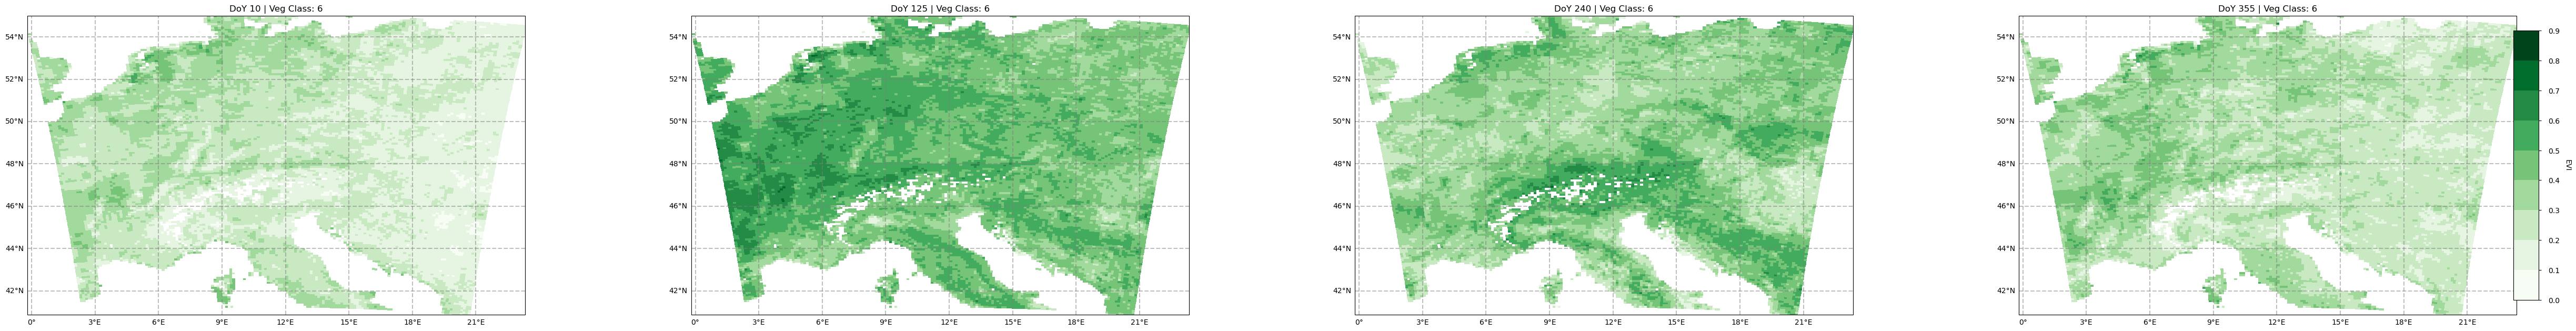

In [9]:
vprm_class = 6

cmap = plt.cm.Greens
cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = '#c4c4c4'
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 0.9, 10)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(111, figsize = figsize(10, ratio=0.3))
for c, ti in enumerate(np.linspace(10, 355, 4, dtype=int)):
    ax = fig.add_axes((c*0.2+0.04, 0 ,0.15, 1.0), projection=ccrs.PlateCarree())
    t = in_base_evi.sel({'vprm_classes': vprm_class, 'time':ti})['evi']
    cb = t.plot.pcolormesh(y='lat', x='lon', cmap=cmap, norm=norm, 
                          add_colorbar=False)
    # world.boundary.plot(ax=ax, transform=ccrs.PlateCarree(), color='k',lw=1.)
    lats = in_base_evi['lat'].values.flatten()
    lons = in_base_evi['lon'].values.flatten()
    ax.set_xlim(np.min(lons), np.max(lons))
    ax.set_ylim(np.min(lats), np.max(lats))
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                     linewidth=1.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.set_title('DoY {} | Veg Class: {}'.format(ti, vprm_class))
    if c == 3:
        axins = inset_axes(ax,
                           width="5%",  
                           height="90%",
                           loc='center right',
                           borderpad=-3
                           )
        cbar = fig.colorbar(cb, cax=axins)
        cbar.ax.get_yaxis().labelpad = 15
        cbar.ax.set_ylabel('EVI', rotation=270)
        
#fig.savefig('....', dpi=500, bbox_inches='tight')
fig.show()
